# Size Distributions Tutorial

In this tutorial, we will explore how to calculate and plot lognormal distributions for aerosol particles. This is commonly used in aerosol science to model the size distribution of particles in different environmental or experimental conditions.


In [12]:
# %%
import numpy as np
import matplotlib.pyplot as plt

from particula.next.particles.properties.lognormal_size_distribution import (
    lognormal_pdf_distribution,
    lognormal_pmf_distribution,
)

## Probability Density Function

(fix this, more details for aerosol science)

The probability density function (PDF) of a lognormal distribution is given by:

$$
f(x, s) = \frac{1}{s x \sqrt{2\pi}} \exp\left(-\frac{\log^2(x)}{2s^2}\right)

$$

where $x$ is the particle diameter, and $s$ is the standard deviation of the distribution.
$$
for x > 0, s > 0
$$

The `scale` parameter is defined as the mode of the distribution.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, `lognorm.pdf(x, s, loc, scale)` is identically equivalent to `lognorm.pdf(y, s) / scale` with `y = (x - loc) / scale`. Note that shifting the location of a distribution does not make it a “noncentral” distribution; noncentral generalizations of some distributions are available in separate classes.

- [PDF Wikipedia](https://en.wikipedia.org/wiki/probability_density_function)
- [Log-normal Wikipedia](https://en.wikipedia.org/wiki/Log-normal_distribution)
- [Log-normal Scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html)

### Define Particle Size Ranges

We use logarithmic spacing for particle diameters to cover a broad size range typically observed in aerosol particles.

In [13]:
# Define the x_values as a range of particle diameters
x_values = np.logspace(-3, 1, 2000)  # From 0.001 to 10 microns

### Single Mode PDF Particle Size Distribution

In this section, we explore modeling a distribution with a single mode, typical for scenarios where particle populations are relatively uniform. The single mode represents a common characteristic size (mode) and spread (geometric standard deviation) of aerosol particles. We utilize parameters for the geometric standard deviation and the modal particle diameter to define this distribution. The distribution is scaled such that the area under the probability density function (PDF) equals the total number of particles, ensuring that it accurately reflects the particle count in terms of probability across different sizes. This method is particularly useful for representing aerosol populations where a single predominant size class exists, making it easier to analyze and predict aerosol behavior in environmental or laboratory settings.

In [14]:
# %%
# Single mode distribution
single_mode_gsd = np.array([1.4])
single_mode = np.array([0.02])
single_mode_nparticles = np.array([1e3])

single_mode_distribution = lognormal_pdf_distribution(
    x_values, single_mode, single_mode_gsd, single_mode_nparticles
)

### Multi-Mode PDF Particle Distribution

For more complex scenarios, such as urban air samples, we often observe multiple modes. Here we define and calculate distributions for a two-mode system.

In [15]:
# %%
# Multi-mode distribution
multi_mode_gsd = np.array([1.4, 1.8])
multi_mode = np.array([0.02, 1.0])
multi_mode_nparticles = np.array([1e3, 1e3])

multi_mode_distribution = lognormal_pdf_distribution(
    x_values, multi_mode, multi_mode_gsd, multi_mode_nparticles
)

### Plotting the PDFs of Particle Size Distributions

Visualizing the probability density functions (PDFs) helps in understanding the frequency of different particle sizes.

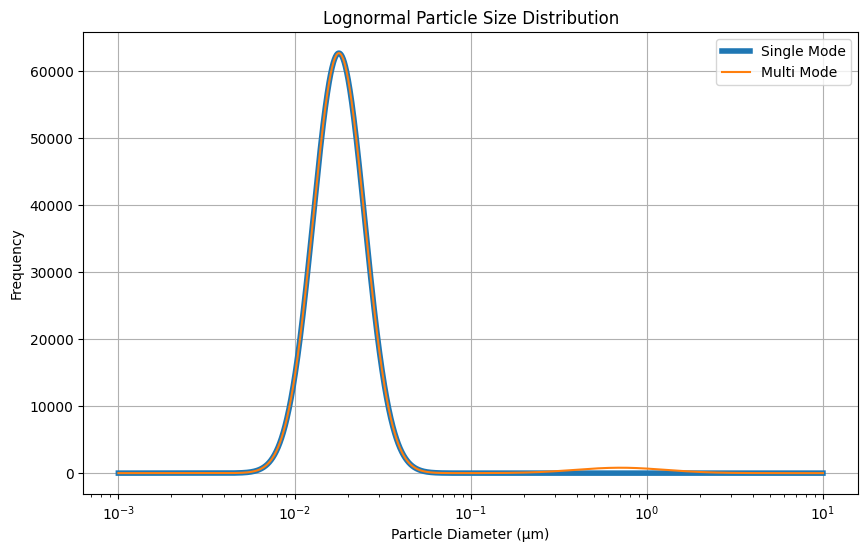

In [16]:
# %%
plt.figure(figsize=(10, 6))
plt.plot(x_values, single_mode_distribution, label="Single Mode", linewidth=4)
plt.plot(x_values, multi_mode_distribution, label="Multi Mode")
plt.title("Lognormal Particle Size Distribution")
plt.xlabel("Particle Diameter (μm)")
plt.ylabel("Frequency")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

### Calculate and Display Total Concentration from PDFs

Total concentration is important for understanding the overall particle load in a sample.

In [17]:
# %%
single_mode_total_concentration = np.trapz(single_mode_distribution, x_values)
multi_mode_total_concentration = np.trapz(multi_mode_distribution, x_values)

print(
    f"Total Concentration for Single Mode: {single_mode_total_concentration}"
)
print(f"Total Concentration for Multi Mode: {multi_mode_total_concentration}")

Total Concentration for Single Mode: 1000.0
Total Concentration for Multi Mode: 2000.000000000001


## Probability Mass Function (PMF) for Aerosol Distributions

The Probability Mass Function (PMF) of aerosol distributions provides a distinct perspective compared to the Probability Density Function (PDF). While the PDF represents the probability of particle sizes occurring within a continuous range, ensuring that the integral over all sizes equals the total number of particles, the PMF deals directly with discrete particle counts.

In PMF, each value represents the actual number of particles expected at a specific size interval, rather than the probability density. This approach is particularly advantageous when quantifying and visualizing the actual particle counts across various size classes, making it ideal for detailed statistical analysis and practical applications like filter testing or health impact studies.

Unlike the PDF, where the area under the curve corresponds to the total number of particles (when scaled appropriately), the PMF sums directly to the total number of particles without needing any integral calculation. Each point on the PMF curve directly indicates the number of particles in that particular size class, thus providing a more intuitive grasp of the size distribution's impact, especially in contexts where the exact count of particles is more relevant than their probability density.

[PMF Wikipedia](https://en.wikipedia.org/wiki/probability_mass_function)

In [18]:
single_pmf_distribution = lognormal_pmf_distribution(
    x_values, single_mode, single_mode_gsd, single_mode_nparticles
)
multi_pmf_distribution = lognormal_pmf_distribution(
    x_values, multi_mode, multi_mode_gsd, multi_mode_nparticles
)

### Plotting the PMFs of Particle Size Distributions

Particle mass functions (PMFs) tell us about the actual number of particles at different sizes.

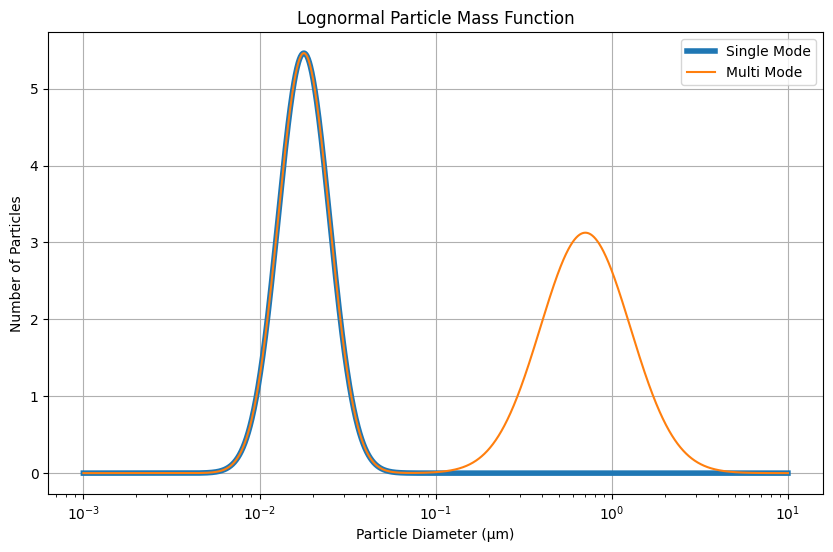

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, single_pmf_distribution, label="Single Mode", linewidth=4)
plt.plot(x_values, multi_pmf_distribution, label="Multi Mode")
plt.title("Lognormal PMF Particle Size Distribution")
plt.xlabel("Particle Diameter (μm)")
plt.ylabel("Number of Particles")
plt.xscale("log")
plt.legend()
plt.grid(True)
plt.show()

### Calculate and Display Total Number of Particles from PMFs

This helps quantify the actual particle count in different modes.

In [20]:
# %%
single_mode_total_concentration = single_pmf_distribution.sum()
multi_mode_total_concentration = multi_pmf_distribution.sum()

print(
    f"Total Concentration for Single Mode: {single_mode_total_concentration}"
)
print(f"Total Concentration for Multi Mode: {multi_mode_total_concentration}")

Total Concentration for Single Mode: 1000.0000000000002
Total Concentration for Multi Mode: 1999.999999999999


## Summary of PDF vs. PMF in Aerosol Distributions

In this tutorial, we explored two fundamental representations of aerosol size distributions: the Probability Density Function (PDF) and the Particle Mass Function (PMF). Both offer valuable insights into aerosol characteristics but serve different analytical purposes:

- **Probability Density Function (PDF)**: The PDF provides a normalized view of particle size distribution where the area under the curve represents the total number of particles. It is ideal for understanding the relative frequency of different particle sizes within a continuous range and for conducting probability-based analyses. The PDF is particularly useful in theoretical studies and simulations where understanding the likelihood of particle sizes is crucial.

- **Particle Mass Function (PMF)**: Conversely, the PMF directly quantifies the actual number of particles in each size interval. This discrete representation is especially useful for practical applications such as air quality monitoring and aerosol delivery systems where knowing the exact count of particles at different sizes is necessary. The PMF is straightforward as it adds up to the total particle count directly, providing a more tangible grasp of particle distribution without requiring integration.

Both methods play critical roles in aerosol science, each complementing the other by offering different perspectives on particle size distributions. Understanding when to use each can significantly enhance the accuracy and relevance of aerosol studies.

### Looking Ahead

In the upcoming tutorial, we will delve into another essential concept in aerosol science: the scaling and measurement of aerosol distributions using \( \frac{dN}{d\log D_p} \) (number concentration per unit of log-diameter interval). This approach provides a deeper understanding of how particle sizes are distributed across logarithmic size intervals, which is crucial for comparing aerosol measurements obtained from different instruments and studies. Stay tuned to explore how this scaling method enhances our ability to characterize and compare aerosol distributions effectively.